# **Local Outlier Factor**
Local Outlier Factor (LOF) adalah algoritma untuk mendeteksi outlier atau anomali dalam suatu dataset berdasarkan kepadatan lokal (local density). LOF mengukur sejauh mana suatu data berbeda dari tetangganya, dengan membandingkan kerapatan lokalnya dengan kerapatan lokal dari titik-titik di sekitarnya.

## **Bagaimana LOF Bekerja?**
1. Menentukan Tetangga (k-nearest neighbors / k-NN):
Untuk setiap titik data, algoritma menghitung jarak ke sejumlah tetangga terdekatnya (k tetangga terdekat).

2. Menghitung Kepadatan Lokal:
LOF menggunakan konsep reachability distance, yaitu jarak maksimum antara suatu titik dan tetangga-tetangganya:

            reachability distance(𝑝,𝑜)=max(k-distance(𝑜),distance(𝑝,𝑜))

  di mana:

- 𝑝 adalah titik yang sedang dievaluasi,
- 𝑜 adalah tetangganya,
- k-distance(𝑜) adalah jarak ke tetangga ke-𝑘 dari 𝑜,
- distance(𝑝,𝑜) adalah jarak Euclidean antara 𝑝 dan 𝑜.

3. Menghitung Kepadatan Lokal Relatif (Local Reachability Density - LRD):
LRD suatu titik dihitung sebagai kebalikan dari rata-rata reachability distance terhadap tetangga-tetangganya.

4. Menghitung LOF Score:
LOF score dihitung dengan membandingkan kepadatan lokal suatu titik dengan kepadatan lokal dari tetangga-tetangganya:

  $
  \text{LOF}(p) = \frac{1}{k} \sum_{o \in N_k(p)} \frac{\text{LRD}(o)}{\text{LRD}(p)}
  $

* Jika LOF(𝑝) ≈ 1, berarti titik 𝑝 mirip dengan tetangganya (bukan outlier).
* Jika LOF(𝑝)>1, berarti titik 𝑝 memiliki kepadatan lebih rendah dibandingkan tetangganya dan bisa dianggap sebagai outlier.
* Jika LOF(𝑝)≪1, titik tersebut lebih padat dibandingkan sekitarnya (kemungkinan besar bukan outlier).


## **Tahapan Penerapan Penggunaan LOF (Local Outlier Factor)**
Untuk menerapkan Local Outlier Factor (LOF) dalam deteksi anomali atau outlier, berikut adalah langkah-langkahnya:

1. Menyiapkan Data

In [ ]:
import numpy as np
import pandas as pd

# Dataset baru dengan koordinat acak (termasuk beberapa outlier)
X = np.array([
    [3, 7], [8, 2], [4, 5], [7, 8], [5, 3],
    [20, 22], [25, 30]  # Outlier di sini
])

# Membuat DataFrame untuk menampilkan data
df = pd.DataFrame(X, columns=["X", "Y"])

# Menampilkan DataFrame
print(df)


    X   Y
0   3   7
1   8   2
2   4   5
3   7   8
4   5   3
5  20  22
6  25  30


2. Menentukan k-neighbor

  menggunakan rumus Euclidean Distance:

  $
  d(A, B) = \sqrt{(x_B - x_A)^2 + (y_B - y_A)^2}
  $

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data awal (dengan beberapa outlier)
data = np.array([
    [3, 7], [8, 2], [4, 5], [7, 8], [5, 3],
    [20, 22], [25, 30]  # Outlier di sini
])

# Membuat DataFrame untuk menampilkan data awal
df = pd.DataFrame(data, columns=['X', 'Y'])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Menentukan jumlah tetangga terdekat (k)
k = 3

# Menyimpan indeks dan jarak tetangga terdekat
neighbors_indices = []
neighbors_distances = []
k_distance = []

# Mencari k tetangga terdekat untuk setiap titik
for i, point in enumerate(data):
    distances = []
    for j, other_point in enumerate(data):
        if i != j:
            distances.append((j, euclidean_distance(point, other_point)))  # (index, distance)

    # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:k]

    # Simpan indeks dan jarak tetangga ke-1, ke-2, ke-3
    neighbors_indices.append([idx for idx, _ in nearest_neighbors])
    neighbors_distances.append([dist for _, dist in nearest_neighbors])

    # Simpan k-distance (jarak ke tetangga ke-k)
    k_distance.append(nearest_neighbors[-1][1])

# Menambahkan hasil ke DataFrame
for i in range(k):
    df[f'k-neighbors_{i+1}'] = [neighbors_indices[j][i] for j in range(len(data))]
    df[f'k-distance_{i+1}'] = [neighbors_distances[j][i] for j in range(len(data))]

# Menampilkan tabel dalam format rapi
print("\n=== Data k-neighbors ===")
print(tabulate(df, headers='keys', tablefmt='grid'))



=== Data k-neighbors ===
+----+-----+-----+-----------------+----------------+-----------------+----------------+-----------------+----------------+
|    |   X |   Y |   k-neighbors_1 |   k-distance_1 |   k-neighbors_2 |   k-distance_2 |   k-neighbors_3 |   k-distance_3 |
+====+=====+=====+=================+================+=================+================+=================+================+
|  0 |   3 |   7 |               2 |        2.23607 |               3 |        4.12311 |               4 |        4.47214 |
+----+-----+-----+-----------------+----------------+-----------------+----------------+-----------------+----------------+
|  1 |   8 |   2 |               4 |        3.16228 |               2 |        5       |               3 |        6.08276 |
+----+-----+-----+-----------------+----------------+-----------------+----------------+-----------------+----------------+
|  2 |   4 |   5 |               0 |        2.23607 |               4 |        2.23607 |               3 |

3. menentukan k-distance
* jarak antara titik dengan tetangga ke-K terdekat
* contoh: K=3 -> jarak ke tetangga ketiga terdekat

In [ ]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Data awal (dengan beberapa outlier)
data = np.array([
    [3, 7], [8, 2], [4, 5], [7, 8], [5, 3],
    [20, 22], [25, 30]  # Outlier di sini
])

# Membuat DataFrame untuk menampilkan data awal
df = pd.DataFrame(data, columns=['X', 'Y'])

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Menentukan jumlah tetangga terdekat (k)
k = 3

# Menyimpan indeks dan jarak tetangga terdekat
neighbors_indices = []
neighbors_distances = []
k_distance = []

# Mencari k tetangga terdekat untuk setiap titik
for i, point in enumerate(data):
    distances = []
    for j, other_point in enumerate(data):
        if i != j:
            distances.append((j, euclidean_distance(point, other_point)))  # (index, distance)

    # Urutkan berdasarkan jarak dan ambil k tetangga terdekat
    distances.sort(key=lambda x: x[1])
    nearest_neighbors = distances[:k]

    # Simpan indeks dan jarak tetangga ke-1, ke-2, ke-3
    neighbors_indices.append([idx for idx, _ in nearest_neighbors])
    neighbors_distances.append([dist for _, dist in nearest_neighbors])

    # Simpan k-distance (jarak ke tetangga ke-k)
    k_distance.append(nearest_neighbors[-1][1])

# Tambahkan k-distance ke DataFrame
df["k-distance"] = k_distance

# Menampilkan tabel dalam format rapi
print("\n=== Data k-distance ===")
print(tabulate(df, headers='keys', tablefmt='grid'))



=== Data k-distance ===
+----+-----+-----+--------------+
|    |   X |   Y |   k-distance |
+====+=====+=====+==============+
|  0 |   3 |   7 |      4.47214 |
+----+-----+-----+--------------+
|  1 |   8 |   2 |      6.08276 |
+----+-----+-----+--------------+
|  2 |   4 |   5 |      4.24264 |
+----+-----+-----+--------------+
|  3 |   7 |   8 |      5.38516 |
+----+-----+-----+--------------+
|  4 |   5 |   3 |      4.47214 |
+----+-----+-----+--------------+
|  5 |  20 |  22 |     22.6716  |
+----+-----+-----+--------------+
|  6 |  25 |  30 |     31.8277  |
+----+-----+-----+--------------+


4. Menghitung Reachability Distance (RD)
Reachability Distance (RD) didefinisikan sebagai:

  $
  RD_k(A, B) = \max(distance_k(B), distance(A, B))
  $

  Artinya, untuk setiap tetangga B dari titik A, nilai RD adalah nilai maksimum antara k-distance(B) dan jarak Euclidean distance(A, B).

In [ ]:
# Menghitung Reachability Distance (RD) dengan format 1 baris per index
rd_data = []

for i, point in enumerate(data):
    neighbor_list = neighbors_indices[i]  # Tetangga dari titik ini
    distance_list = neighbors_distances[i]  # Jarak ke tetangga
    rd_list = [max(k_distance[neighbor], distance_list[j]) for j, neighbor in enumerate(neighbor_list)]  # RD

    # Menyimpan dalam satu baris per index
    row = [i]  # Index titik
    row += [neighbor_list[j] for j in range(k)]  # Tetangga
    row += [distance_list[j] for j in range(k)]  # Jarak
    row += [rd_list[j] for j in range(k)]  # Reachability Distance
    rd_data.append(row)

# Membuat kolom untuk DataFrame
columns = ["Index"]
for i in range(k):
    columns += [f"Tetangga_{i+1}", f"Jarak_{i+1}", f"RD_{i+1}"]

# Membuat DataFrame untuk RD dengan format 1 baris per index
df_rd = pd.DataFrame(rd_data, columns=columns)

# Menampilkan tabel Reachability Distance dalam format 1 baris per index
print("\n=== Reachability Distance (RD) dalam 1 Baris per Index ===")
print(tabulate(df_rd, headers='keys', tablefmt='grid'))



=== Reachability Distance (RD) dalam 1 Baris per Index ===
+----+---------+--------------+-----------+--------+--------------+-----------+----------+--------------+-----------+----------+
|    |   Index |   Tetangga_1 |   Jarak_1 |   RD_1 |   Tetangga_2 |   Jarak_2 |     RD_2 |   Tetangga_3 |   Jarak_3 |     RD_3 |
+====+=========+==============+===========+========+==============+===========+==========+==============+===========+==========+
|  0 |       0 |            2 |         3 |      4 |      2.23607 |   4.12311 |  4.47214 |      4.24264 |   5.38516 |  4.47214 |
+----+---------+--------------+-----------+--------+--------------+-----------+----------+--------------+-----------+----------+
|  1 |       1 |            4 |         2 |      3 |      3.16228 |   5       |  6.08276 |      4.47214 |   5       |  6.08276 |
+----+---------+--------------+-----------+--------+--------------+-----------+----------+--------------+-----------+----------+
|  2 |       2 |            0 |      

5. Menghitung Local Reachability Density (LRD)
Local Reachability Density (LRD) dihitung dengan:

  $
  LRD(A) = \frac{k}{\sum_{B \in kNN(A)} RD(A, B)}
  $

  LRD menunjukkan seberapa rapat atau jarang titik tersebut dibandingkan dengan tetangganya.

  Intrepretasi:

* LRD rendah -> Wilayah jarang (calon outlier)
* LRD Tinggi -> wilayah padat

In [ ]:
# Menghitung Local Reachability Density (LRD)
lrd_data = []

for i, point in enumerate(data):
    rd_list = [max(k_distance[neighbor], neighbors_distances[i][j]) for j, neighbor in enumerate(neighbors_indices[i])]  # RD_k(p, o)
    lrd = k / sum(rd_list)  # LRD(p)

    # Menyimpan (Index, X, Y, LRD)
    lrd_data.append([i, data[i][0], data[i][1], lrd])

# Membuat DataFrame untuk LRD
df_lrd = pd.DataFrame(lrd_data, columns=["Index", "X", "Y", "LRD"])

# Menampilkan tabel LRD dengan X dan Y
print("\n=== Local Reachability Density (LRD) ===")
print(tabulate(df_lrd, headers='keys', tablefmt='grid'))



=== Local Reachability Density (LRD) ===
+----+---------+-----+-----+-----------+
|    |   Index |   X |   Y |       LRD |
+====+=========+=====+=====+===========+
|  0 |       0 |   3 |   7 | 0.212767  |
+----+---------+-----+-----+-----------+
|  1 |       1 |   8 |   2 | 0.192865  |
+----+---------+-----+-----+-----------+
|  2 |       2 |   4 |   5 | 0.209359  |
+----+---------+-----+-----+-----------+
|  3 |       3 |   7 |   8 | 0.212767  |
+----+---------+-----+-----+-----------+
|  4 |       4 |   5 |   3 | 0.202736  |
+----+---------+-----+-----+-----------+
|  5 |       5 |  20 |  22 | 0.0407585 |
+----+---------+-----+-----+-----------+
|  6 |       6 |  25 |  30 | 0.0361775 |
+----+---------+-----+-----+-----------+


6. Menghitung Local Outlier Factor (LOF)

  LOF dihitung dengan rumus:

  $
  \text{LOF}_k(A) := \frac{1}{|N_k(A)|} \sum_{B \in N_k(A)} \frac{\text{lrd}_k(B)}{\text{lrd}_k(A)} = \frac{1}{|N_k(A)| \cdot \text{lrd}_k(A)} \sum_{B \in N_k(A)} \text{lrd}_k(B)
  $

  LOF menunjukkan seberapa besar titik tersebut menjadi outlier dibandingkan dengan tetangganya.

  Interpretasi:

* LOF ≈ 1 ->inlier(kepadatan mirip tetangga)
* LOF > 1 ->Outlier(kepadatan lebih rendah

In [ ]:
# Menghitung Local Outlier Factor (LOF)
lof_data = []

# Mengambil LRD dari DataFrame df_lrd
lrd_values = df_lrd["LRD"].values

for i, point in enumerate(data):
    lrd_neighbors = [lrd_values[neighbor] for neighbor in neighbors_indices[i]]  # LRD dari tetangga
    lof = (1 / k) * sum(lrd_neighbors) / lrd_values[i]  # Rumus LOF

    # Menentukan apakah data termasuk outlier
    outlier_label = "Outlier" if lof > 1.5 else "Normal"

    # Menyimpan hasil (Index, X, Y, LOF, Outlier)
    lof_data.append([i, data[i][0], data[i][1], lof, outlier_label])

# Membuat DataFrame untuk LOF
df_lof = pd.DataFrame(lof_data, columns=["Index", "X", "Y", "LOF", "Status"])

# Menampilkan tabel LOF
print("\n=== Local Outlier Factor (LOF) ===")
print(tabulate(df_lof, headers='keys', tablefmt='grid'))



=== Local Outlier Factor (LOF) ===
+----+---------+-----+-----+----------+-----------+
|    |   Index |   X |   Y |      LOF | Outlier   |
+====+=========+=====+=====+==========+===========+
|  0 |       0 |   3 |   7 | 0.978947 | Normal    |
+----+---------+-----+-----+----------+-----------+
|  1 |       1 |   8 |   2 | 1.07996  | Normal    |
+----+---------+-----+-----+----------+-----------+
|  2 |       2 |   4 |   5 | 1.00031  | Normal    |
+----+---------+-----+-----+----------+-----------+
|  3 |       3 |   7 |   8 | 0.978947 | Normal    |
+----+---------+-----+-----+----------+-----------+
|  4 |       4 |   5 |   3 | 1.01115  | Normal    |
+----+---------+-----+-----+----------+-----------+
|  5 |       5 |  20 |  22 | 3.77599  | Outlier   |
+----+---------+-----+-----+----------+-----------+
|  6 |       6 |  25 |  30 | 4.29634  | Outlier   |
+----+---------+-----+-----+----------+-----------+


## **Menghitung LOF menggunakan Library sklearn**

In [9]:
import numpy as np
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Data contoh (termasuk beberapa outlier)
data = np.array([
    [3, 7], [8, 2], [4, 5], [7, 8], [5, 3],
    [20, 22], [25, 30]  # Outlier di sini
])

# Membuat DataFrame
columns = ["X", "Y"]
df = pd.DataFrame(data, columns=columns)

# Menentukan jumlah tetangga k
k = 3

# Inisialisasi model LOF
lof = LocalOutlierFactor(n_neighbors=k, metric='euclidean')

# Menyesuaikan model dengan data
lof.fit(data) # you need to fit the model to the data first

# Mendapatkan LOF score
df["LOF_Score"] = -lof.negative_outlier_factor_  # Semakin tinggi, semakin besar kemungkinan outlier
df["Outlier"] = np.where(df["LOF_Score"] > 1.5, "Outlier", "Normal")  # Ambang batas LOF untuk outlier

# Menampilkan hasil
print(df)

    X   Y  LOF_Score  Outlier
0   3   7   0.978947   Normal
1   8   2   1.079964   Normal
2   4   5   1.000306   Normal
3   7   8   0.978947   Normal
4   5   3   1.011151   Normal
5  20  22   3.775987  Outlier
6  25  30   4.296342  Outlier


## **Visualisasi Outlier**


=== Hasil LOF ===
    X   Y  LOF Score  Outlier
0   3   7   0.978947   Normal
1   8   2   1.079964   Normal
2   4   5   1.000306   Normal
3   7   8   0.978947   Normal
4   5   3   1.011151   Normal
5  20  22   3.775987  Outlier
6  25  30   4.296342  Outlier


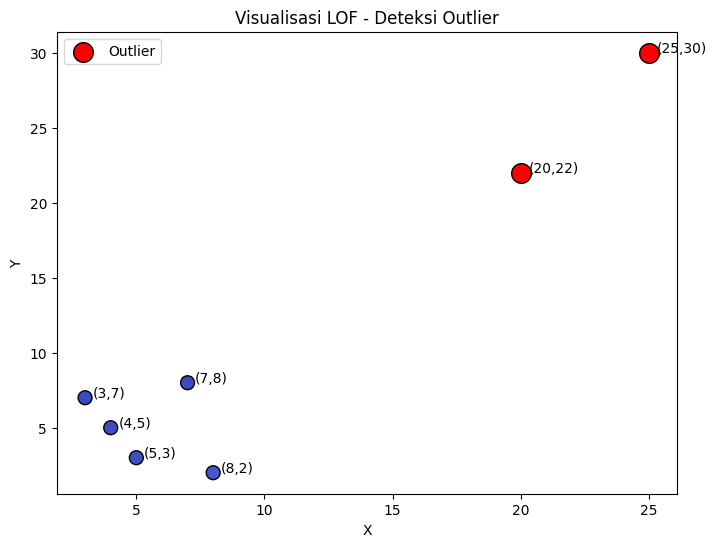

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import LocalOutlierFactor

# Data dengan outlier di (20,22) dan (25,30)
data = np.array([
    [3, 7], [8, 2], [4, 5], [7, 8], [5, 3],
    [20, 22], [25, 30]  # Outlier
])

# Membuat model LOF
k = 3  # Jumlah tetangga
lof = LocalOutlierFactor(n_neighbors=k)
outlier_scores = lof.fit_predict(data)  # -1 untuk outlier, 1 untuk inlier
lof_scores = -lof.negative_outlier_factor_  # Semakin tinggi, semakin outlier

# Membuat DataFrame untuk hasil
columns = ["X", "Y", "LOF Score", "Status"]
df = pd.DataFrame(data, columns=["X", "Y"])
df["LOF Score"] = lof_scores
df["Outlier"] = ["Outlier" if x == -1 else "Normal" for x in outlier_scores]

# Menampilkan DataFrame hasil
print("\n=== Hasil LOF ===")
print(df)

# Visualisasi hasil
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=lof_scores, cmap='coolwarm', edgecolors='k', s=100)

# Menandai outlier
for i, (x, y) in enumerate(data):
    if outlier_scores[i] == -1:  # Jika outlier
        plt.scatter(x, y, color='red', edgecolors='k', s=200, label='Outlier' if 'Outlier' not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(x+0.3, y, f"({x},{y})", fontsize=10)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualisasi LOF - Deteksi Outlier")
plt.legend()
plt.show()

## **Kelebihan LOF**
1. Mendeteksi outlier lokal yang tidak terlihat metode global
2. Adaptif terhadap variasi kapdatan data
3. Cocok untuk data multidimensi

## **Kekurangan LOF**
1. Tidak ada nilai ambang universal
2. Komputasi lambat untuk data besar
3. Sensitif terhadap pemilihan K